In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, fft, rfft, ifftshift
import statistics as stats

# Creating Gaussian Distribution

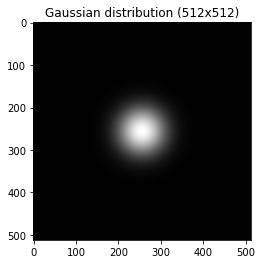

0.09746940812052533


In [71]:
# Initializing value of x-axis and y-axis
# in the range -1 to 1
size=pow(2,9)

x, y = np.meshgrid(np.linspace(-10,10,size), np.linspace(-10,10,size))
dst = np.sqrt(x*x+y*y)
 
# Initializing sigma and muu
sigma = 1.5
muu = 0
 
# Calculating Gaussian array
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )

plt.imshow(gauss)
plt.title('Gaussian distribution ({size}x{size})'.format(size=size))
plt.show()
print(np.std(np.std(gauss, axis=1)))

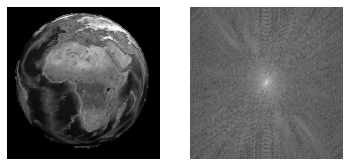

In [90]:
image_filename = "Earth.png"
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
plt.set_cmap("gray")
ft = calculate_2dft(image)
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

26.22279321543936
38.70108684768211


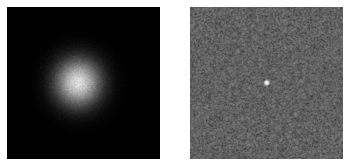

In [35]:
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
plt.set_cmap("gray")
ft = calculate_2dft(heatmap.T)
plt.subplot(121)
plt.imshow(heatmap.T)

# test=[]
# for i in range(len(heatmap.T)):
#     test.append(np.std(heatmap.T[i]))

print(np.std(np.std(heatmap.T, axis=0)))
print(np.std(heatmap.T))
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()
#print(np.std(abs(ft)))

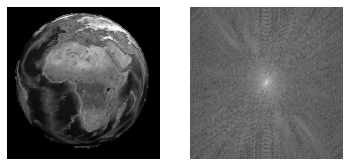

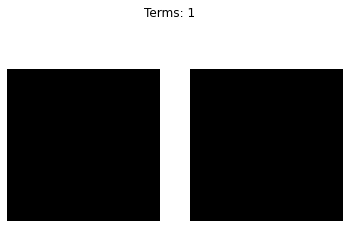

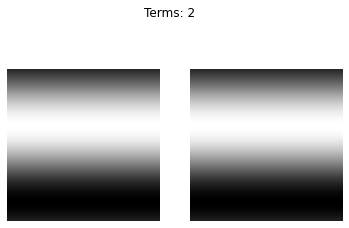

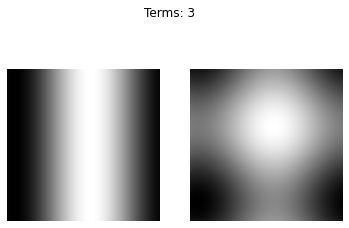

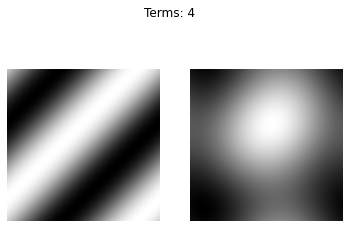

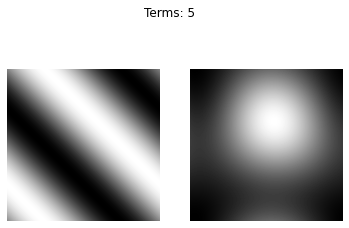

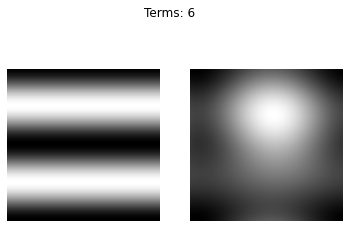

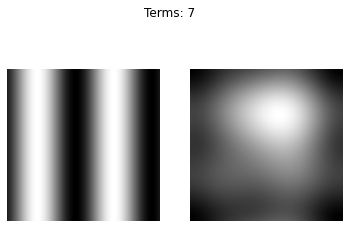

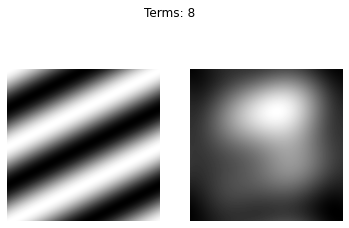

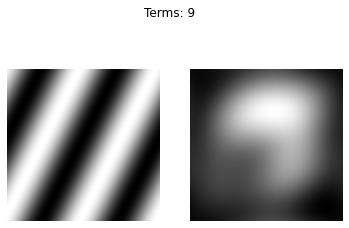

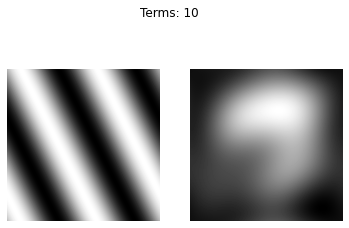

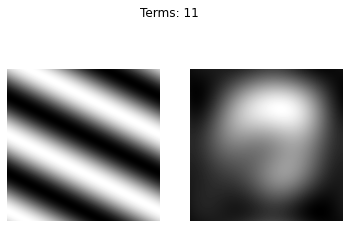

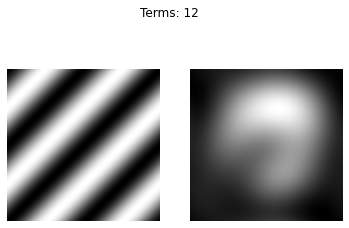

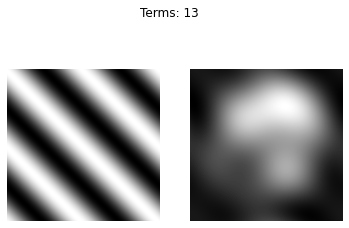

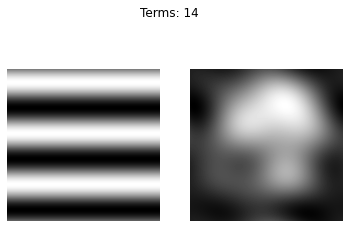

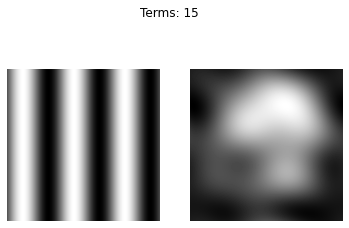

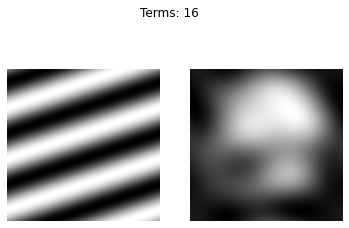

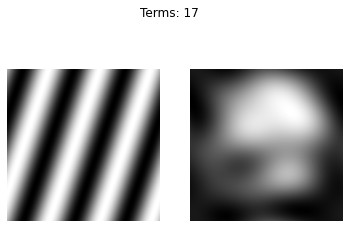

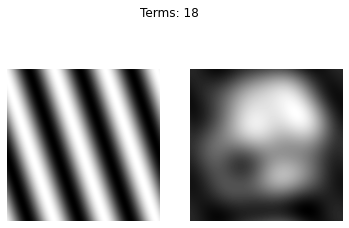

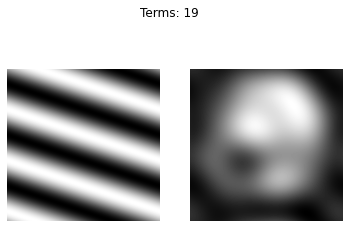

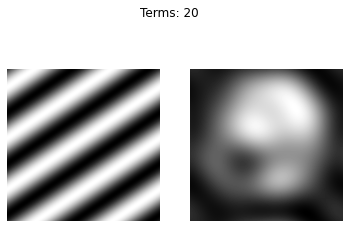

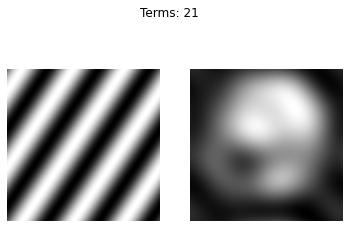

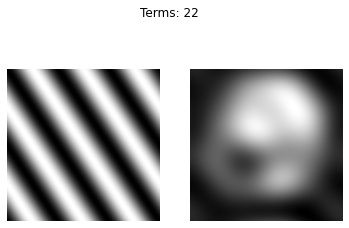

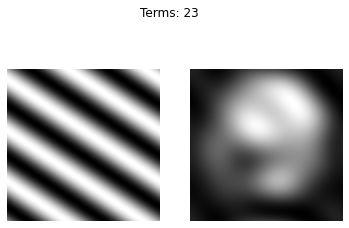

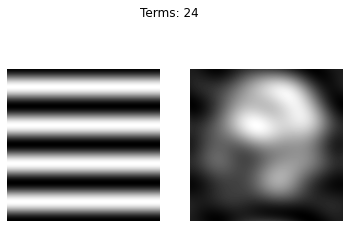

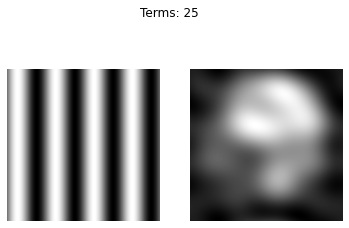

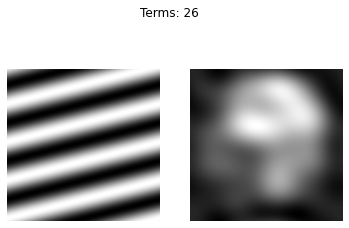

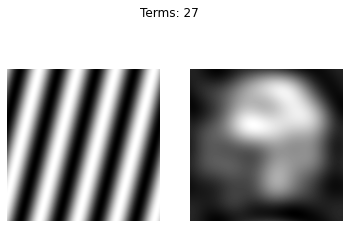

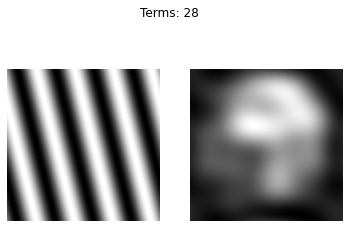

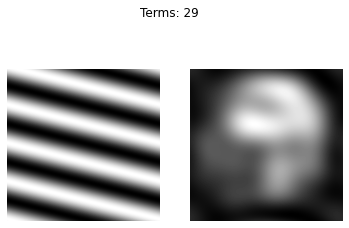

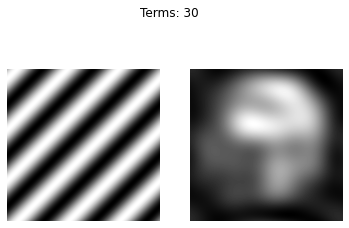

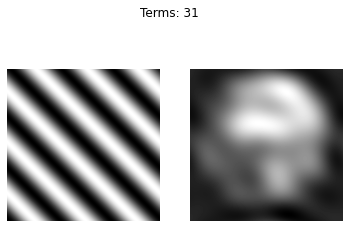

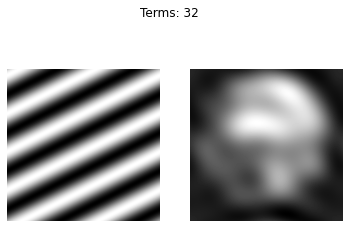

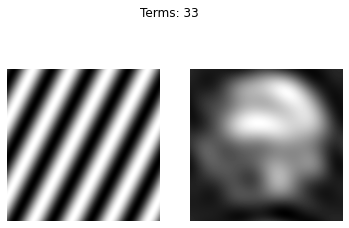

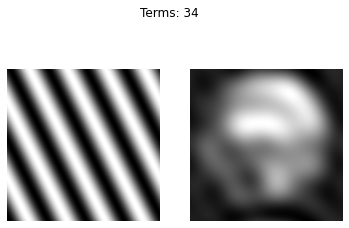

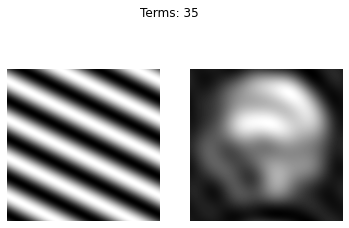

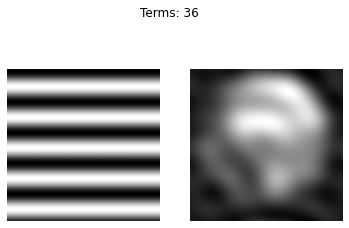

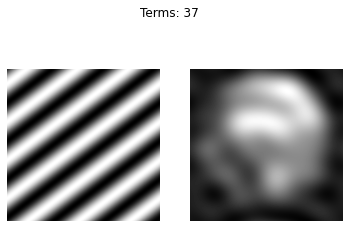

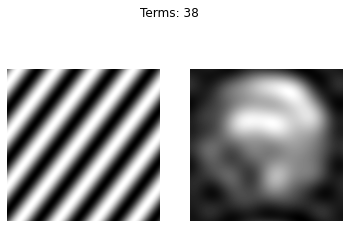

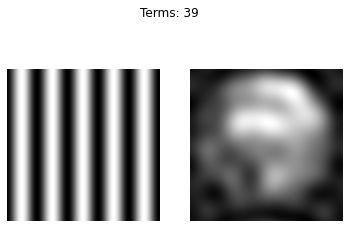

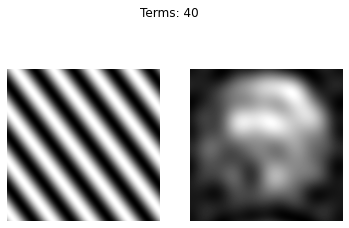

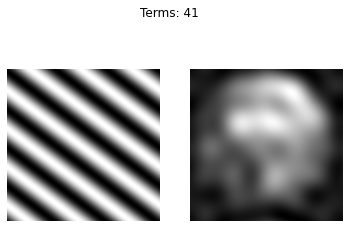

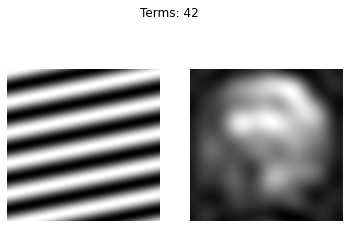

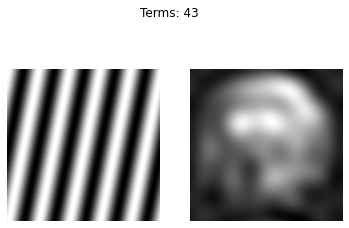

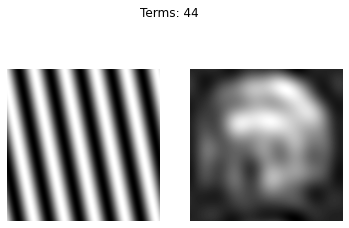

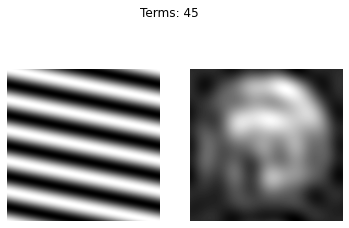

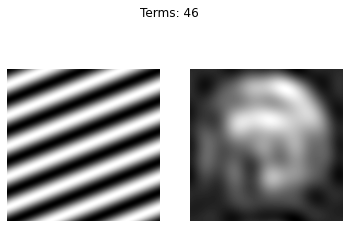

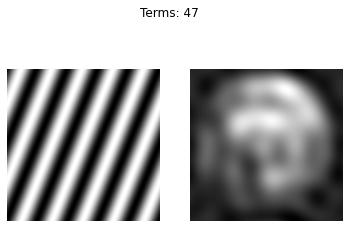

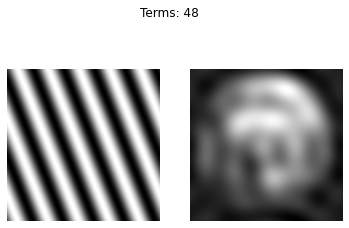

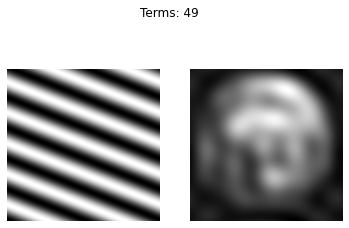

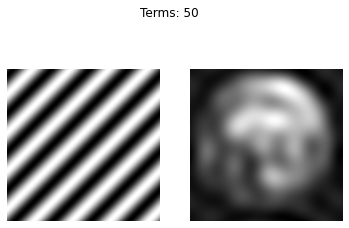

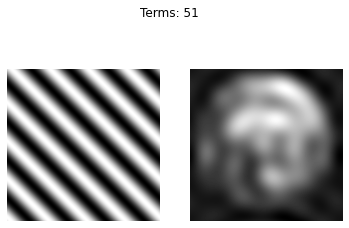

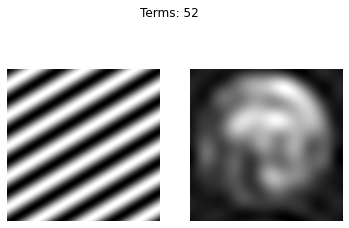

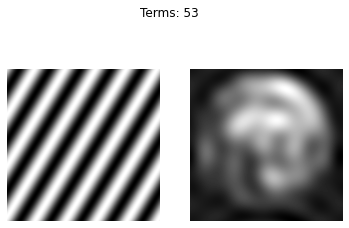

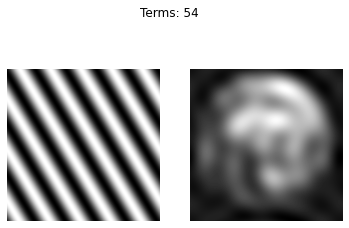

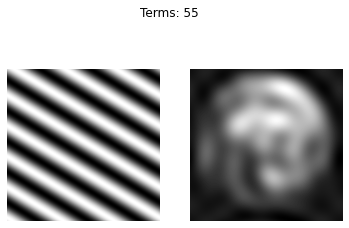

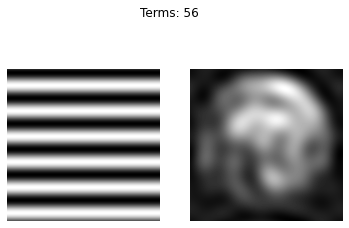

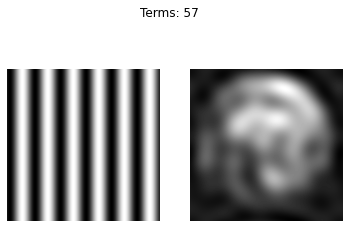

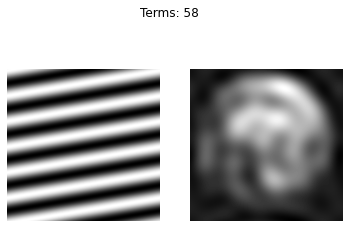

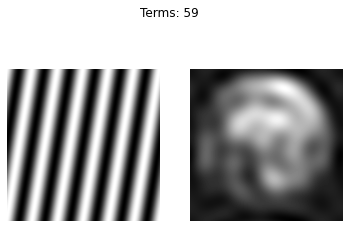

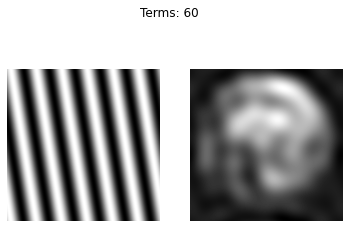

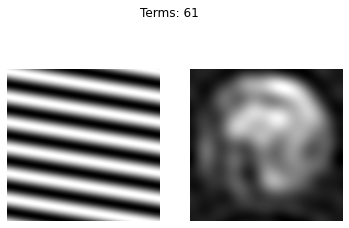

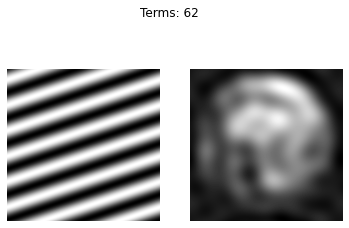

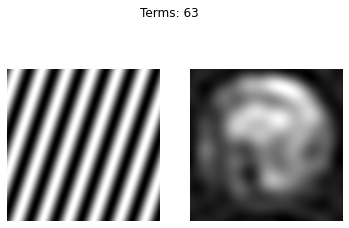

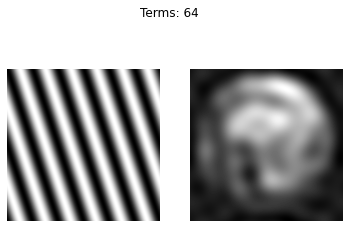

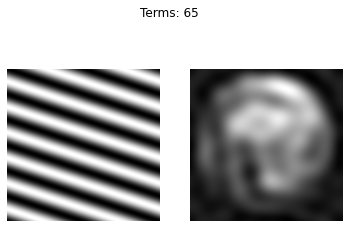

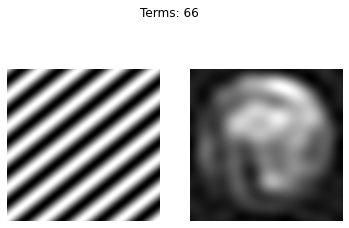

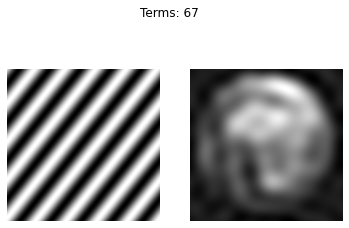

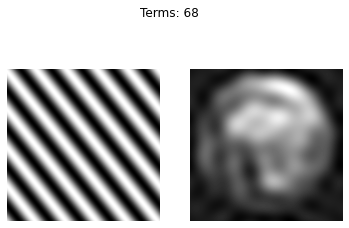

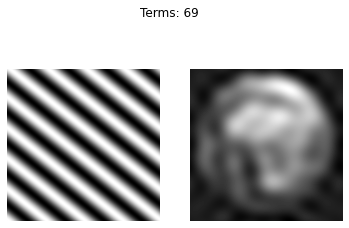

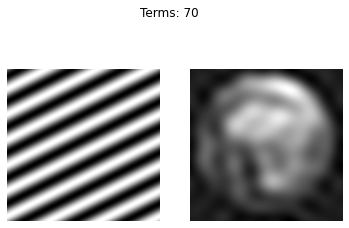

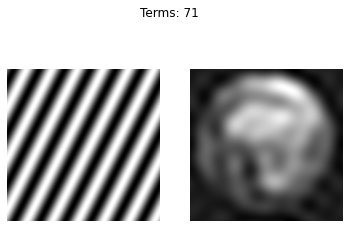

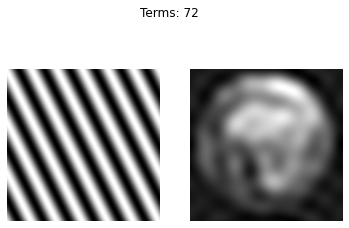

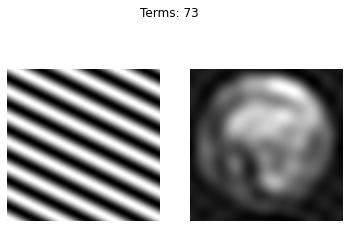

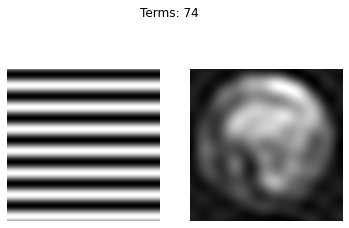

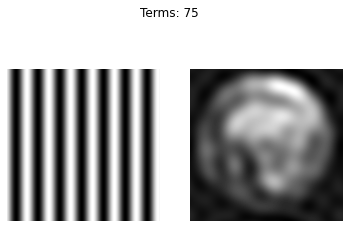

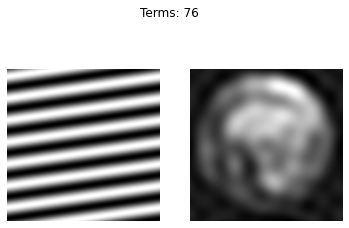

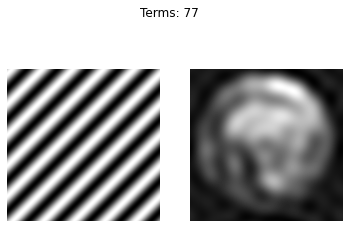

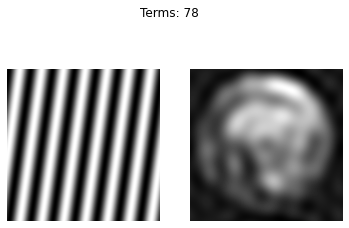

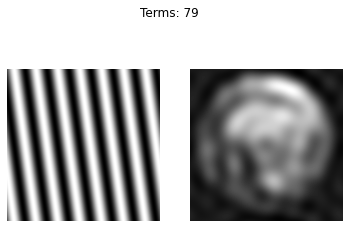

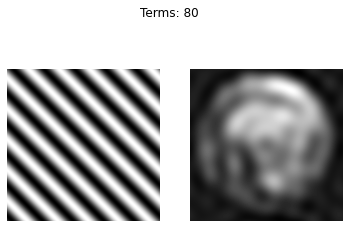

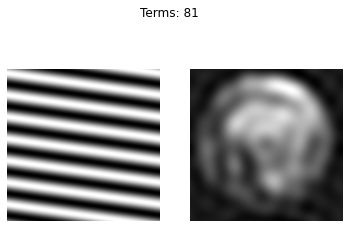

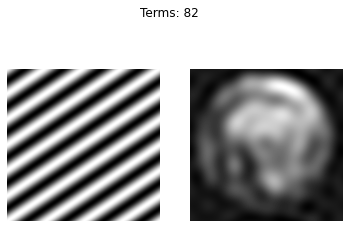

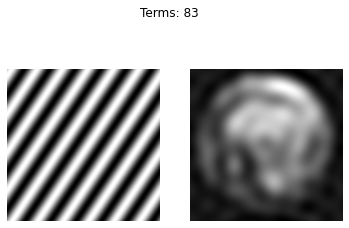

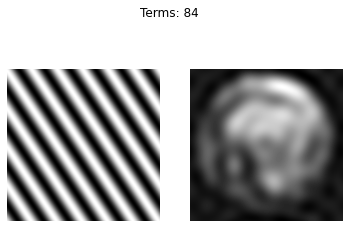

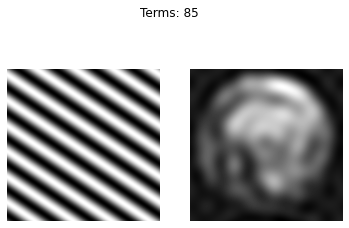

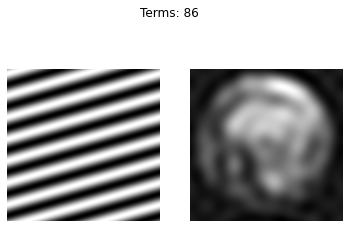

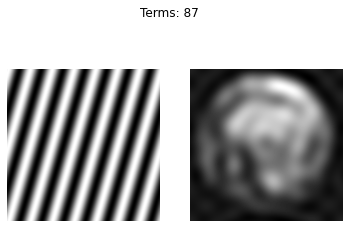

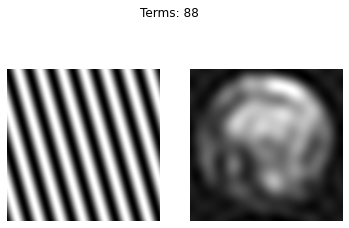

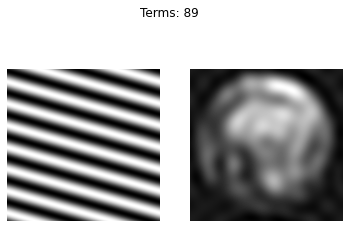

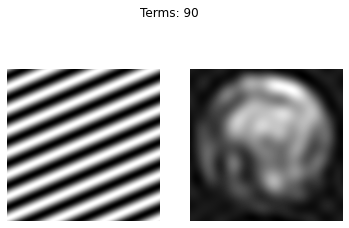

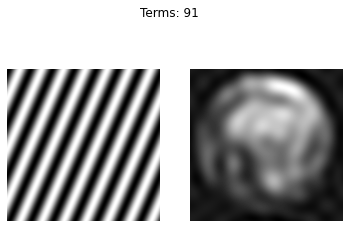

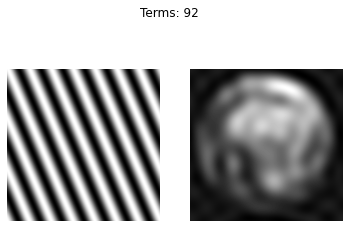

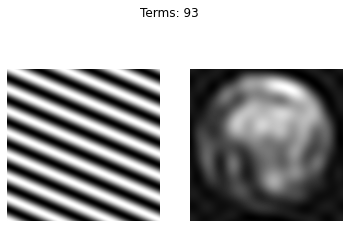

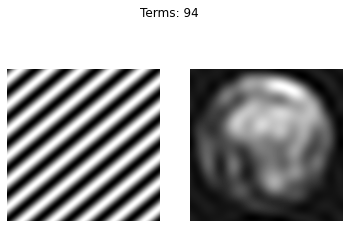

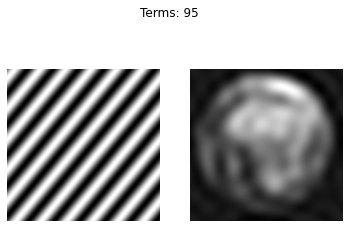

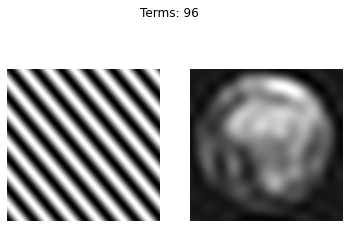

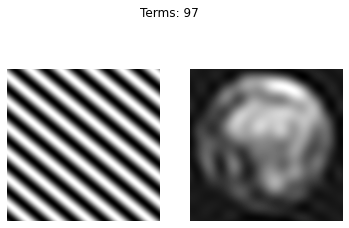

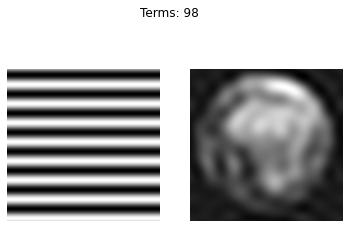

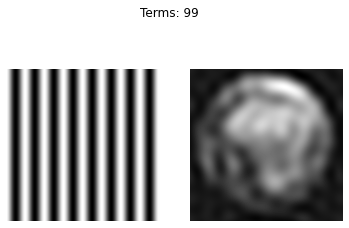

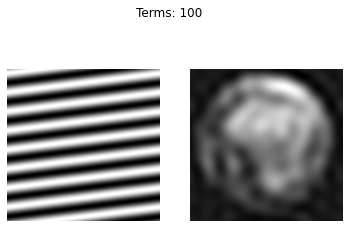

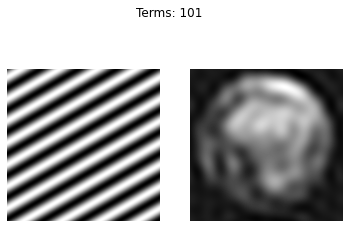

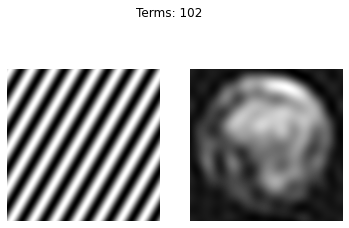

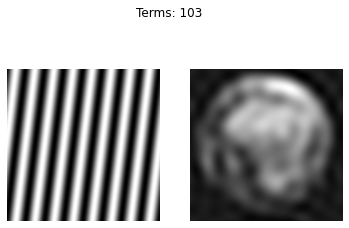

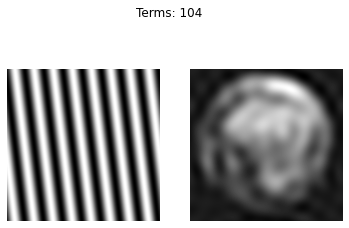

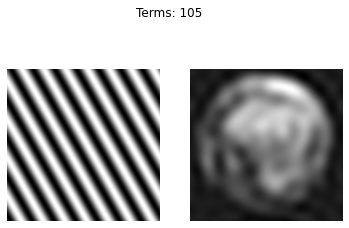

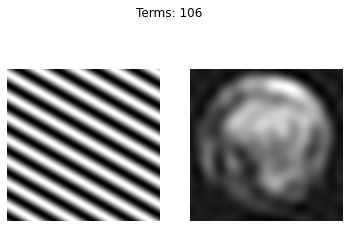

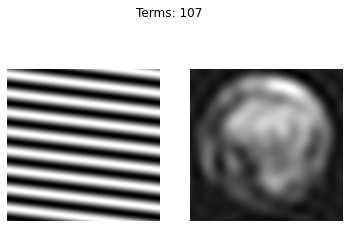

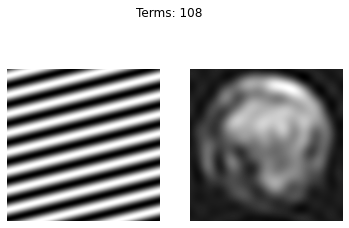

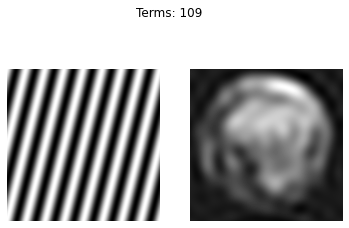

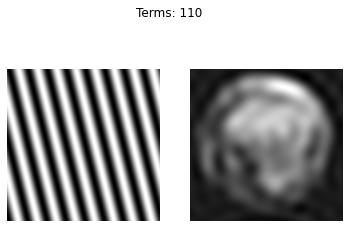

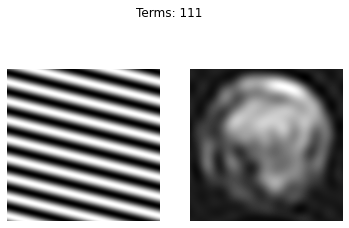

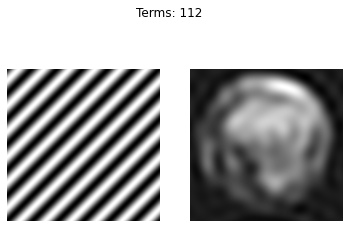

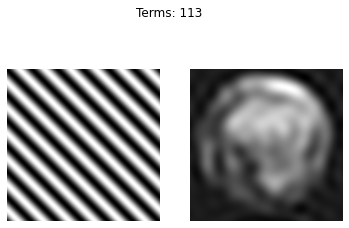

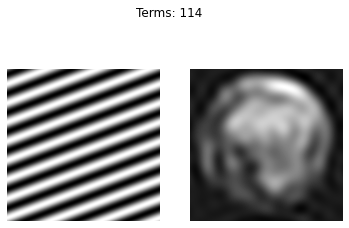

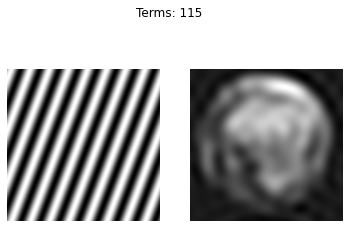

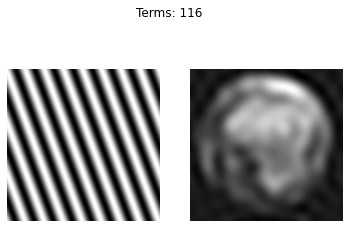

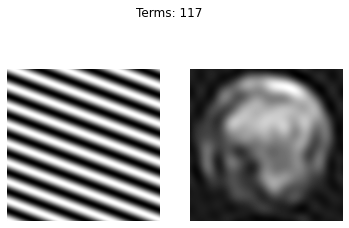

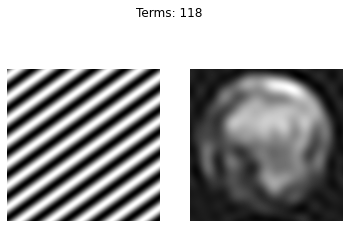

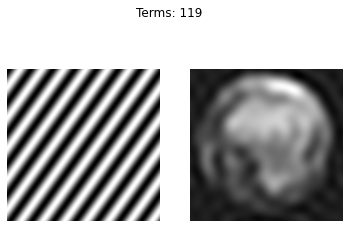

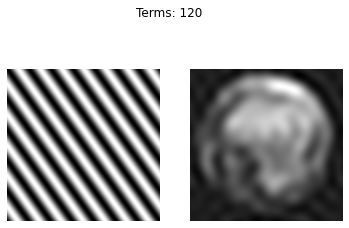

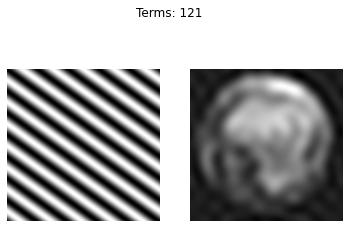

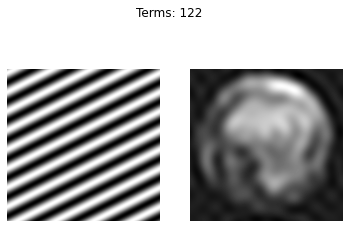

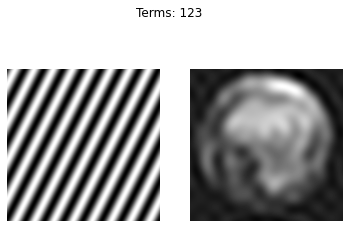

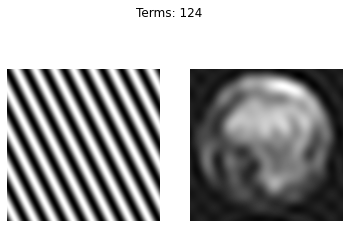

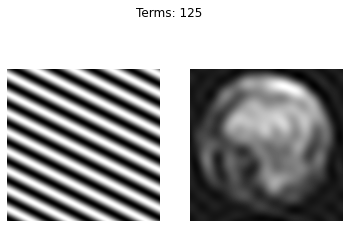

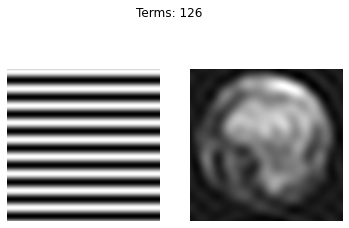

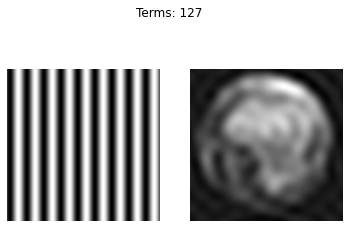

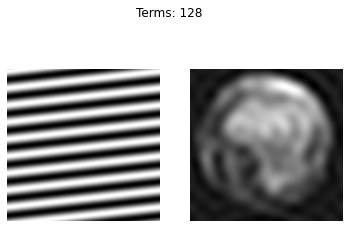

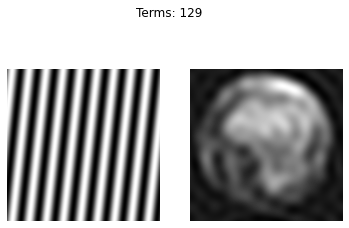

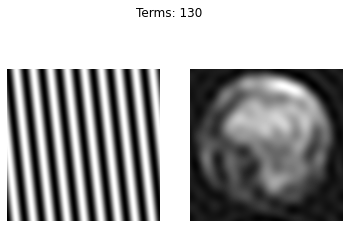

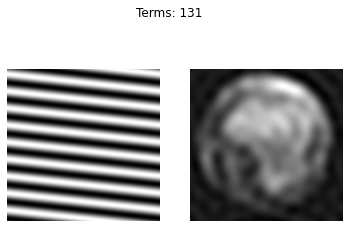

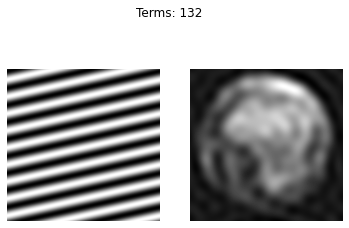

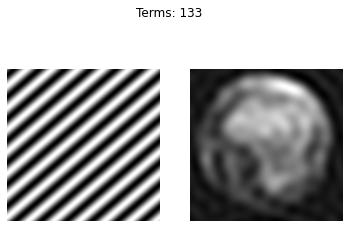

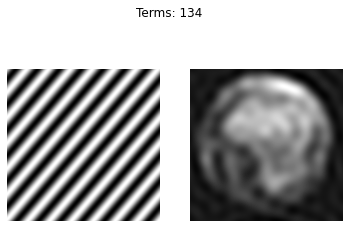

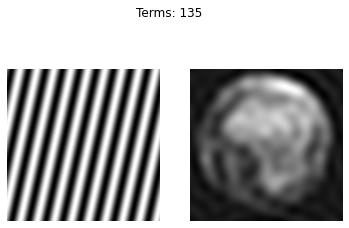

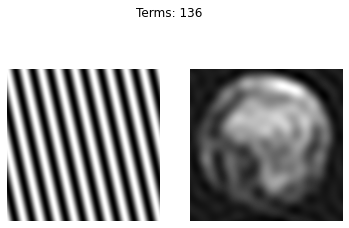

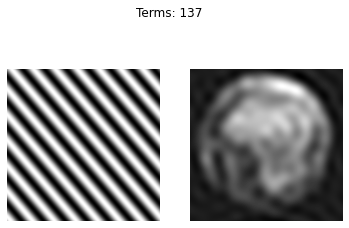

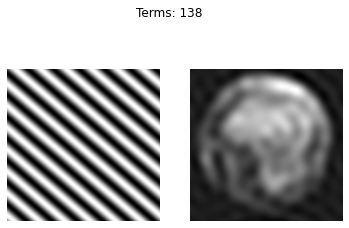

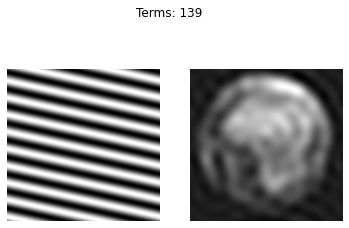

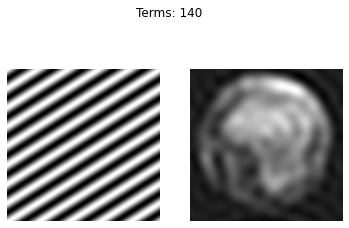

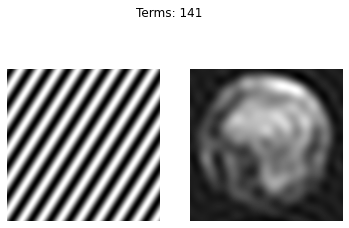

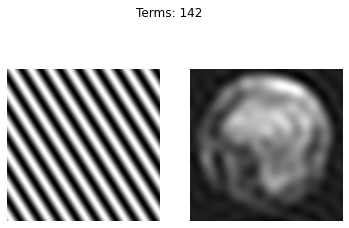

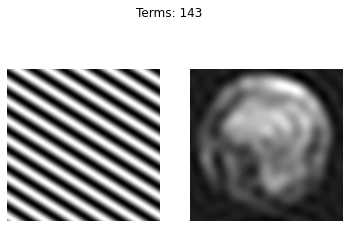

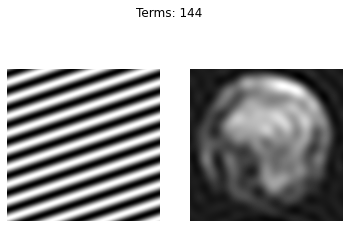

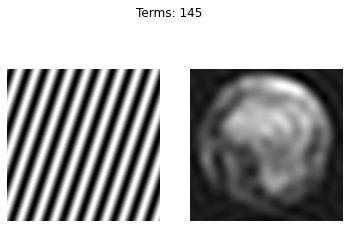

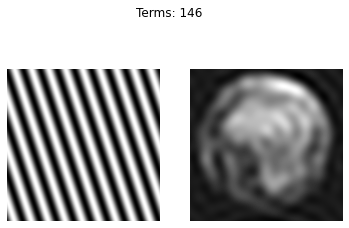

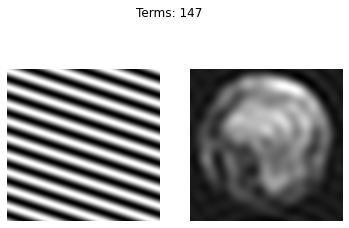

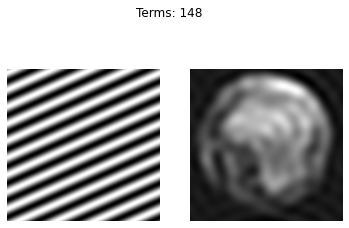

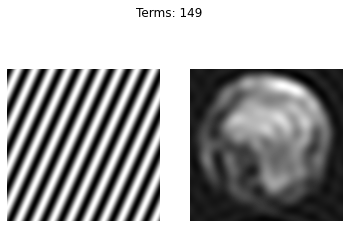

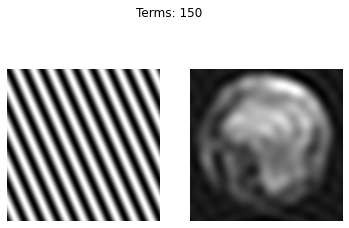

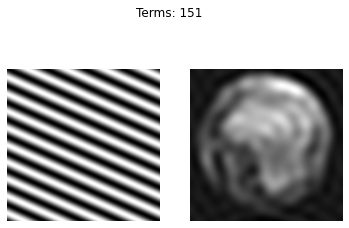

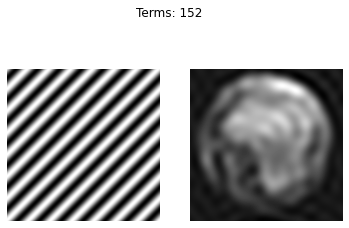

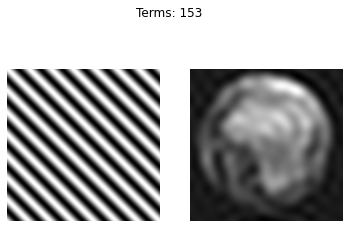

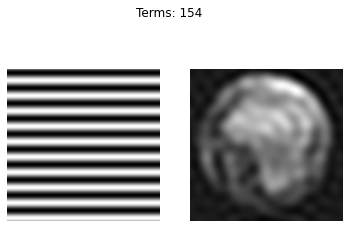

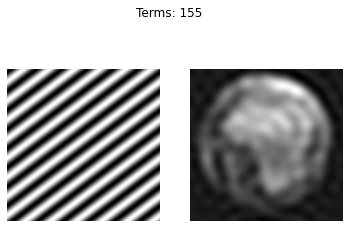

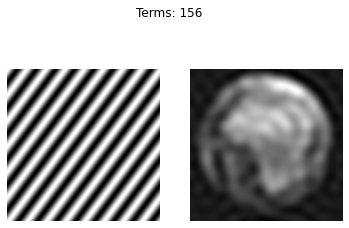

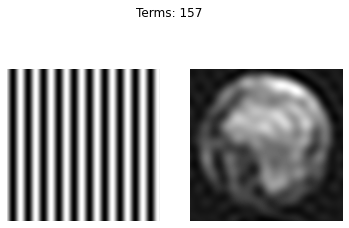

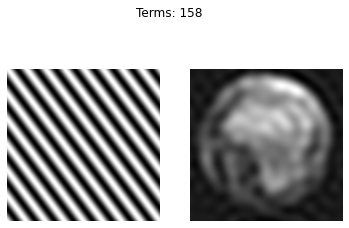

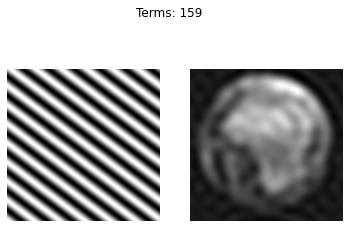

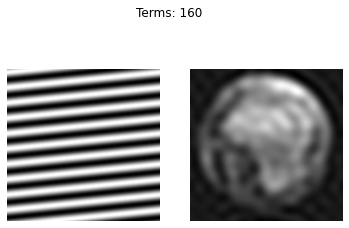

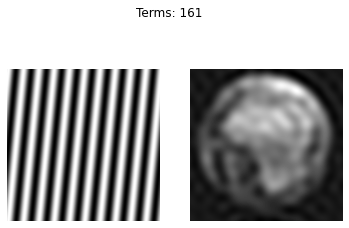

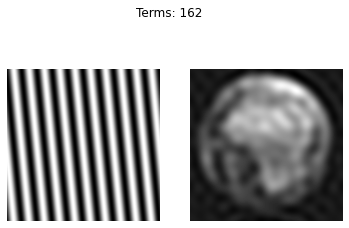

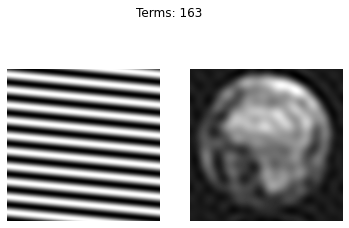

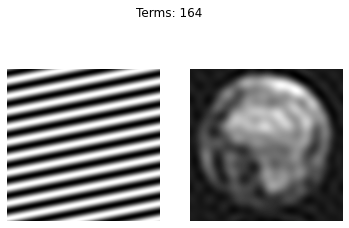

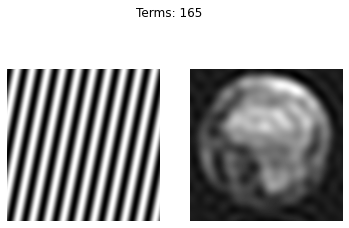

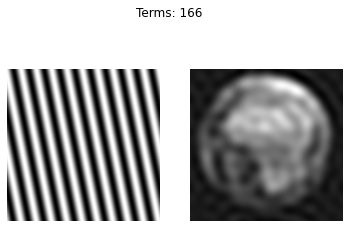

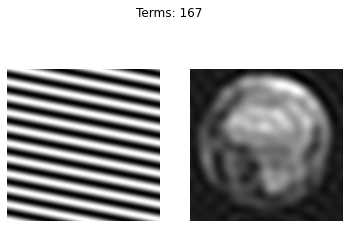

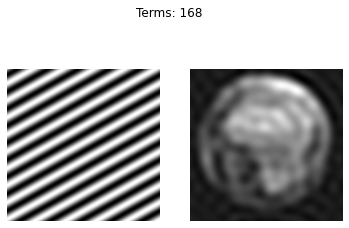

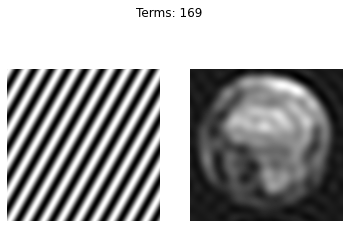

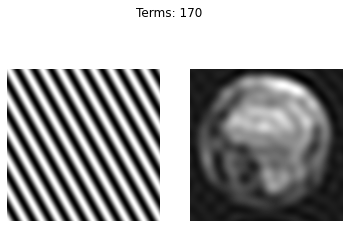

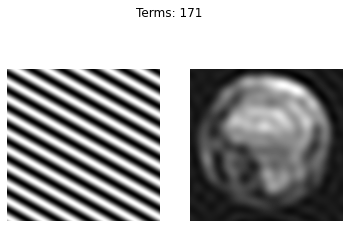

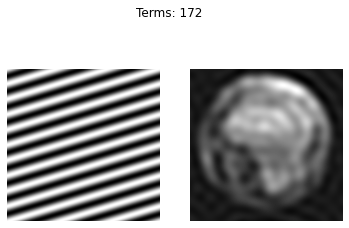

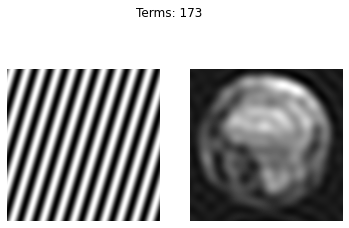

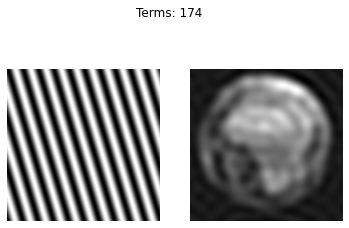

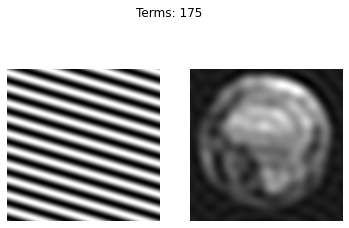

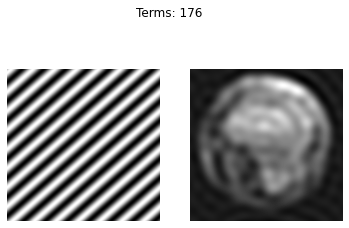

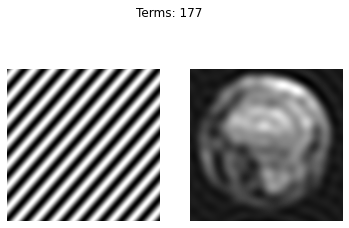

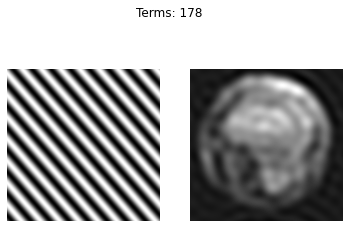

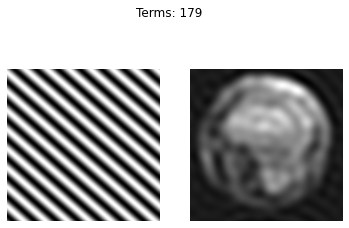

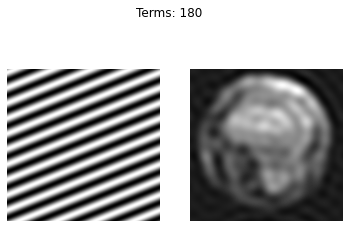

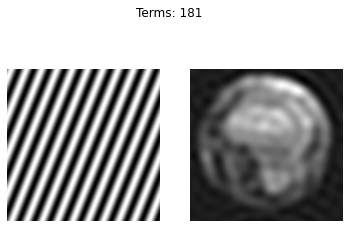

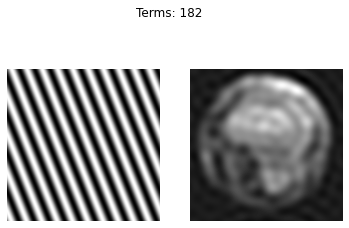

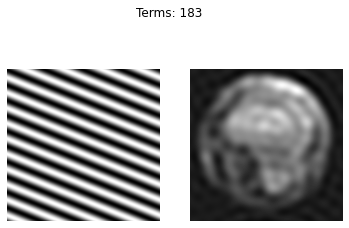

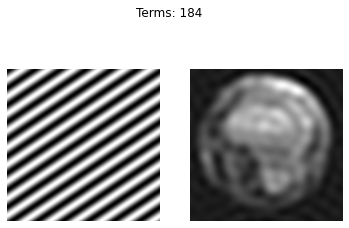

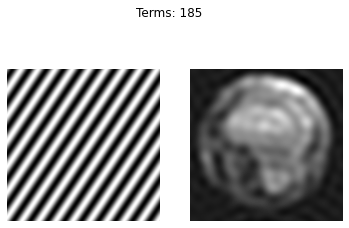

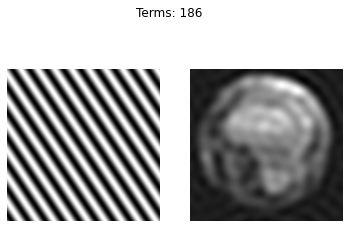

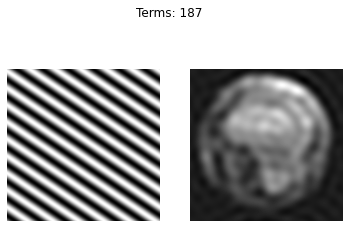

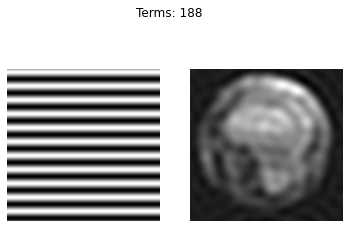

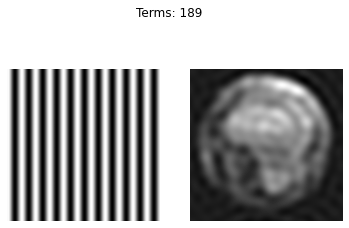

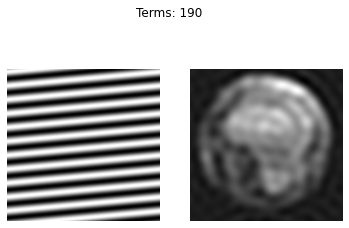

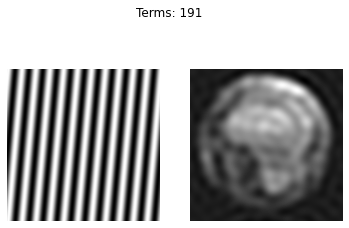

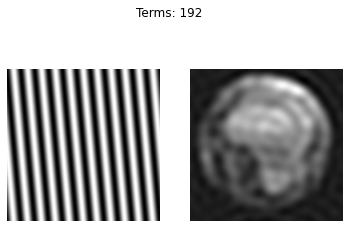

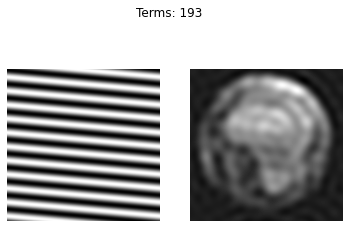

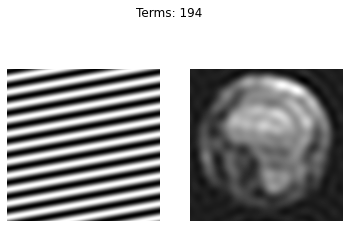

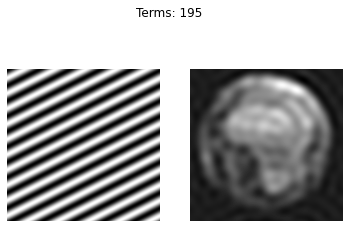

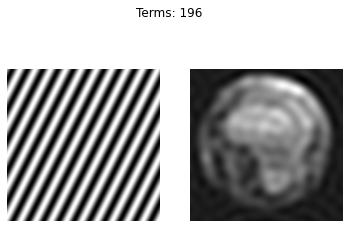

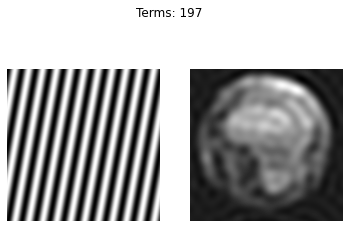

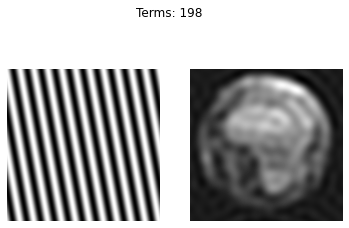

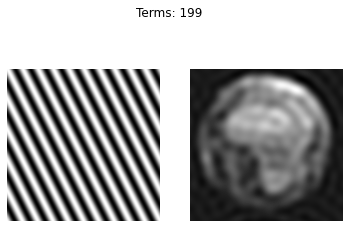

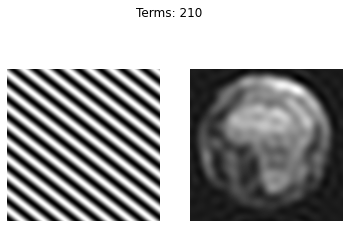

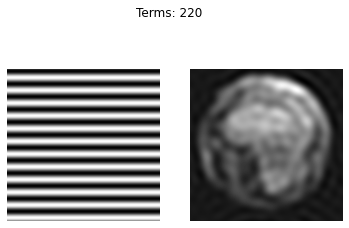

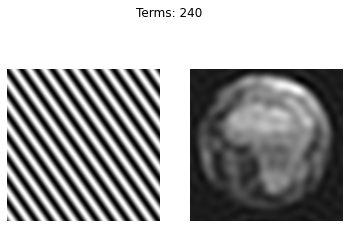

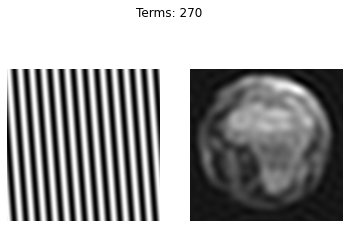

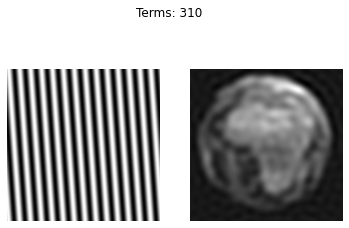

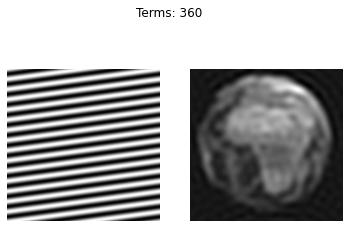

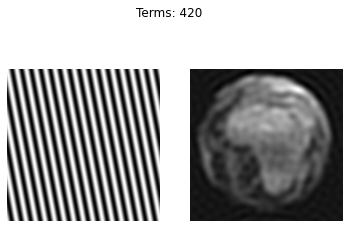

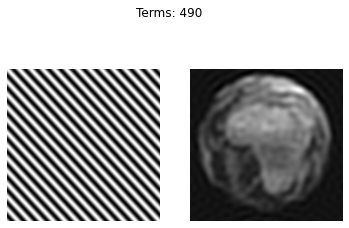

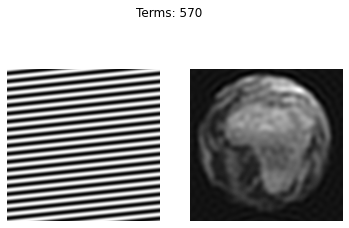

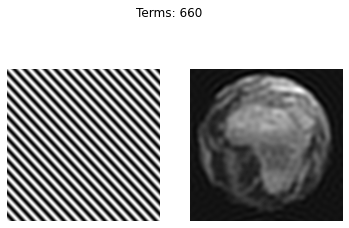

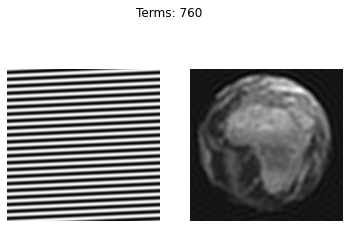

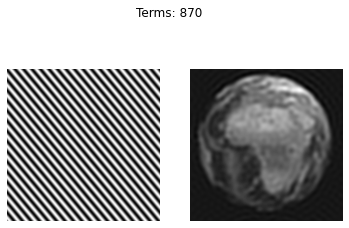

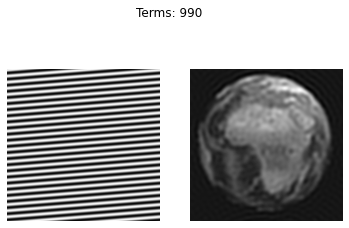

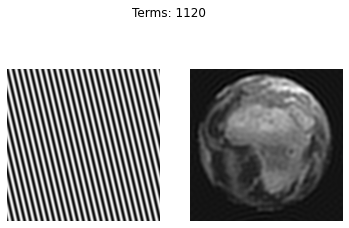

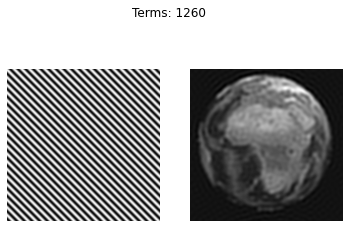

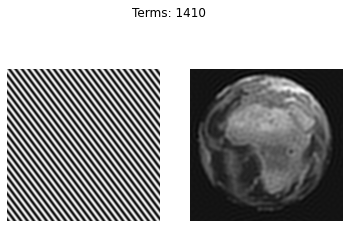

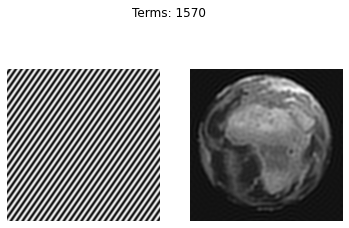

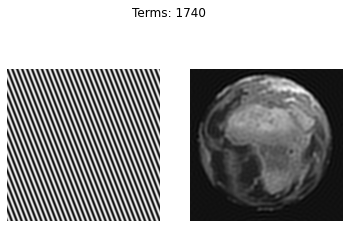

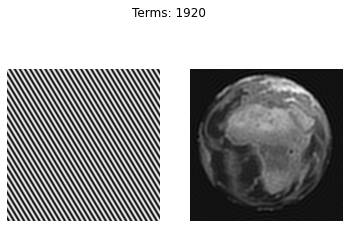

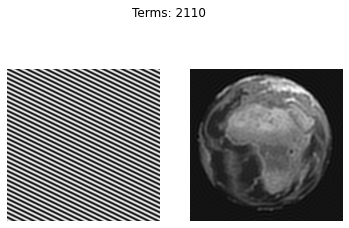

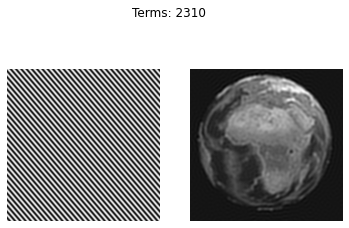

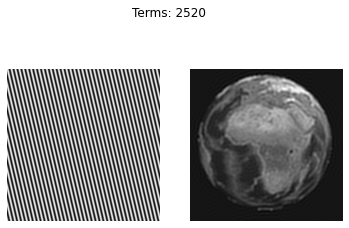

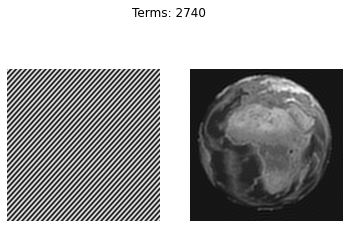

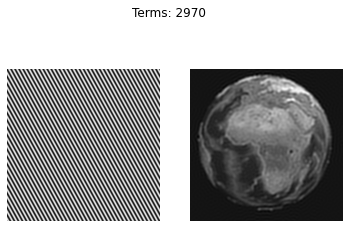

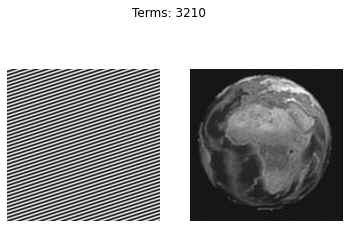

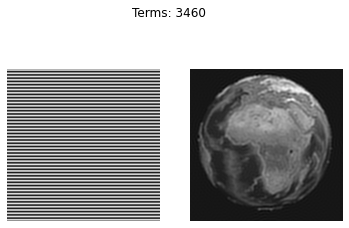

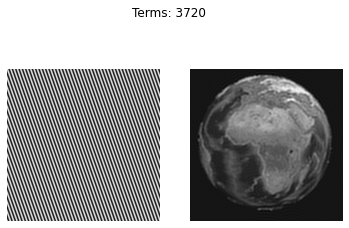

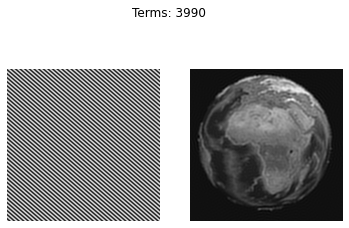

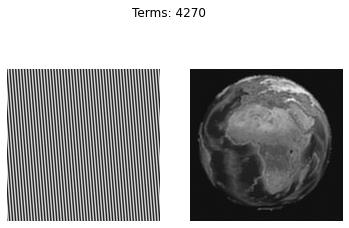

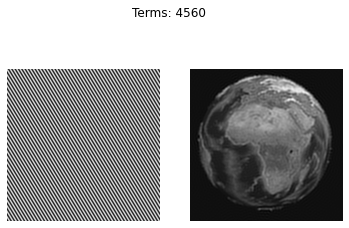

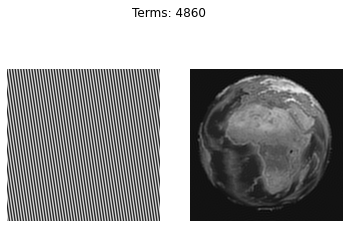

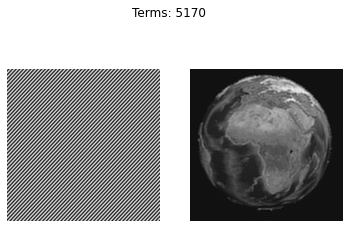

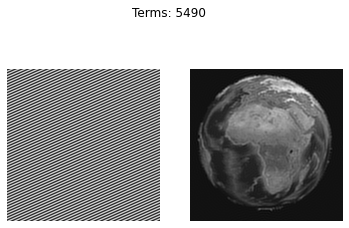

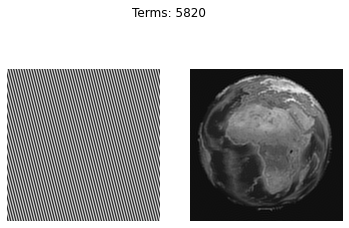

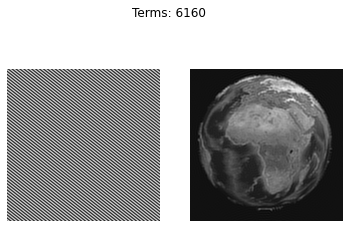

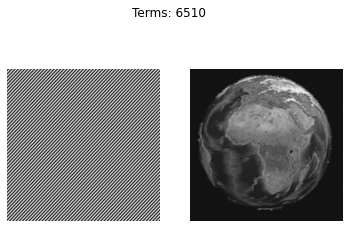

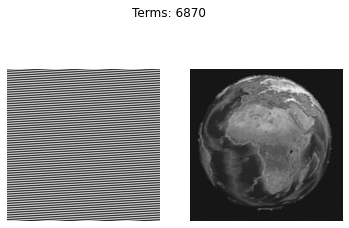

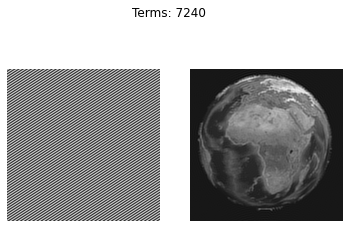

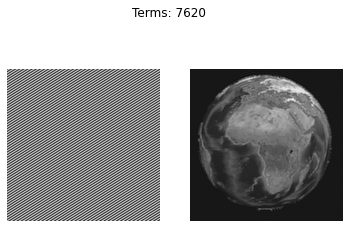

KeyboardInterrupt: 

In [77]:
image_filename = "Earth.png"
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real
def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))
def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)
# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)
# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)
# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)
plt.set_cmap("gray")
ft = calculate_2dft(image)
# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)
# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0
# All steps are displayed until display_all_until value
display_all_until = 200
# After this, skip which steps to display using the
# display_step value
display_step = 10
# Work out index of next step to display
next_display = display_all_until + display_step
# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0
        # Don't display every step
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                # Accelerate animation the further the
                # iteration runs by increasing
                # display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)
plt.show()

# Applying FFT

C:\Users\David\AppData\Local\Temp\ipykernel_13280\4216101971.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fourier))


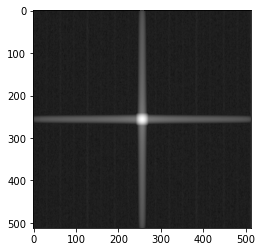

3.0017537065110385


In [87]:
fourier = fftshift(fft2(gauss)/np.sqrt(len(gauss)))
fourier=abs(fourier)
#print(fourier)
    
plt.imshow(np.log(fourier))
plt.show()
print(np.std(fourier))

C:\Users\David\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


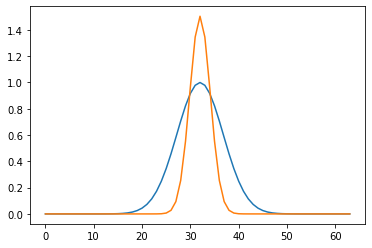

0.34250407124283017


In [209]:
from pylab import *
N = 32
sigma=1.5
x = r_[arange(0, 10, 10./N), arange(-10, 0, 10./N)]
y = exp(-x*x/(2*sigma**2))
y_fft = fft(y) / sqrt(2 * N)
plot(r_[y[N:], y[:N]])
plot(r_[y_fft[N:], y_fft[:N]])
show()
print(np.std(y_fft))

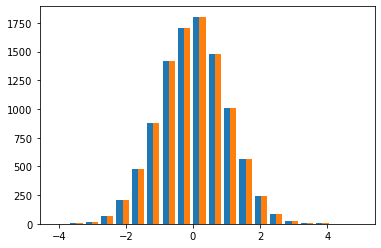

1.0010413486580756


In [219]:
mu=[0,0]
sigma=[[1,1],[1,1]]
N=10000
data=np.random.multivariate_normal(mu,sigma,N)
plt.hist(data,20)
plt.show()
print(np.std(data))

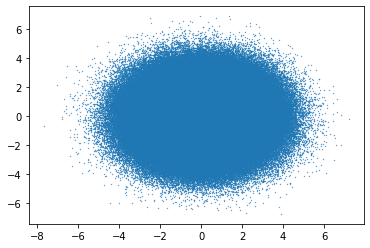

1.409272369614234


In [86]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

# Generate some test data
mu=0
sigma=1.5

N=1000000
size=pow(2,10)
x = np.random.normal(mu,sigma,N)
y = np.random.normal(mu,sigma,N)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(size,size))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.clf()
#plt.imshow(heatmap.T, extent=extent, origin='lower')
ax.scatter(x,y, s=.1)
plt.show()
print()

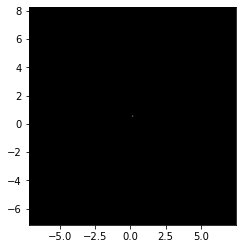

20.58903248498269


In [74]:
ft=fftshift(fft2(ifftshift(heatmap.T))/np.sqrt(len(heatmap.T)))

plt.clf()
plt.imshow(abs(ft), extent=extent)
plt.show()
print(np.mean(np.std(abs(ft), axis=0)))

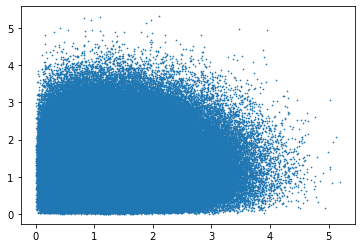

0.6954374134696918


In [89]:
fig, ax = plt.subplots()

frx=fftshift(fft(x)/np.sqrt(len(x)))
fry=fftshift(fft(y)/np.sqrt(len(y)))

frx, fry = abs(frx), abs(fry)

heatmap, xedges, yedges = np.histogram2d(frx, fry, bins=(size,size))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.clf()
#plt.imshow(heatmap.T, extent=extent)
ax.scatter(frx,fry,s=.2)
plt.show()
print(np.std(frx))